In [1]:
import numpy as np
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import os
os.getcwd()

'C:\\Users\\LENOVO'

In [4]:
os.chdir("E:\\INSOFE\\Internship\\Data")

In [5]:
# reading the data from the source file path

diagnosis_data = pd.read_csv('E:\\INSOFE\\Internship\\Data\\org_data.csv')
print(diagnosis_data.shape)

(58509, 49)


In [6]:
diagnosis_data.V49.value_counts()

11    5319
10    5319
9     5319
8     5319
7     5319
6     5319
5     5319
4     5319
3     5319
2     5319
1     5319
Name: V49, dtype: int64

In [7]:
diagnosis_data.dtypes

V1     float64
V2     float64
V3     float64
V4     float64
V5     float64
V6     float64
V7     float64
V8     float64
V9     float64
V10    float64
V11    float64
V12    float64
V13    float64
V14    float64
V15    float64
V16    float64
V17    float64
V18    float64
V19    float64
V20    float64
V21    float64
V22    float64
V23    float64
V24    float64
V25    float64
V26    float64
V27    float64
V28    float64
V29    float64
V30    float64
V31    float64
V32    float64
V33    float64
V34    float64
V35    float64
V36    float64
V37    float64
V38    float64
V39    float64
V40    float64
V41    float64
V42    float64
V43    float64
V44    float64
V45    float64
V46    float64
V47    float64
V48    float64
V49      int64
dtype: object

In [8]:
X = diagnosis_data.iloc[:,:-1]
Y = diagnosis_data[diagnosis_data.columns[48]]

In [9]:
print(X.shape)
print(Y.shape)

(58509, 48)
(58509,)


In [10]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.40)

E:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
x_test,x_val,y_test,y_val = train_test_split(x_test,y_test,test_size = 0.50)

In [12]:
x_train.shape,x_test.shape,x_val.shape

((35105, 48), (11702, 48), (11702, 48))

In [13]:
y_train.shape,y_test.shape,y_val.shape

((35105,), (11702,), (11702,))

In [14]:
 #temp=y_train.copy()
print(temp.iloc[511])

NameError: name 'temp' is not defined

In [15]:
#from keras.utils.np_utils import to_categorical
#y_train = to_categorical(y_train)
#y_val = to_categorical(y_val)


In [16]:
y_train = y_train.astype('category')
y_test = y_test.astype('category')

In [17]:
print(y_train.shape)
print(y_test.shape)

(35105,)
(11702,)


In [18]:
y_train.dtypes

category

In [19]:
y_train = pd.get_dummies(y_train)
#y_test = pd.get_dummies(y_test)

In [20]:
y_train = np.array(y_train)
y_test = np.array(y_test)
x_train = np.array(x_train)
x_test = np.array(x_test)


In [21]:
y_test

array([ 6,  8,  4, ...,  7,  4, 11], dtype=int64)

In [125]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import adam
adam(lr = 0.00001)

In [133]:
model = Sequential()
model.add(Dense(260,input_dim = 48,activation= 'sigmoid'))
model.add(Dense(180,activation = 'relu'))
model.add(Dense(100))
model.add(Dense(11,activation= "softmax"))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [134]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 260)               12740     
_________________________________________________________________
dense_43 (Dense)             (None, 180)               46980     
_________________________________________________________________
dense_44 (Dense)             (None, 100)               18100     
_________________________________________________________________
dense_45 (Dense)             (None, 11)                1111      
Total params: 78,931
Trainable params: 78,931
Non-trainable params: 0
_________________________________________________________________


In [136]:
model.fit(x_train,y_train,epochs=50,verbose=1,validation_split=0.1)

Train on 31594 samples, validate on 3511 samples
Epoch 1/50
31594/31594 [==============================] - 4s - loss: 0.9026 - acc: 0.5888 - val_loss: 0.8524 - val_acc: 0.5924
Epoch 2/50
31594/31594 [==============================] - 4s - loss: 0.8367 - acc: 0.6177 - val_loss: 0.7745 - val_acc: 0.6374
Epoch 3/50
31594/31594 [==============================] - 4s - loss: 0.6980 - acc: 0.6987 - val_loss: 0.5790 - val_acc: 0.7539
Epoch 4/50
31594/31594 [==============================] - 4s - loss: 0.4948 - acc: 0.7983 - val_loss: 0.3975 - val_acc: 0.8473
Epoch 5/50
31594/31594 [==============================] - 4s - loss: 0.4235 - acc: 0.8303 - val_loss: 0.3529 - val_acc: 0.8696
Epoch 6/50
31594/31594 [==============================] - 4s - loss: 0.3750 - acc: 0.8541 - val_loss: 0.3840 - val_acc: 0.8539
Epoch 7/50
31594/31594 [==============================] - 4s - loss: 0.3576 - acc: 0.8615 - val_loss: 0.3119 - val_acc: 0.8866
Epoch 8/50
31594/31594 [==============================] - 4s -

In [144]:
y_pred = model.predict_classes(x_test)
for i in range(0,len(y_pred)):
    y_pred[i] = y_pred[i]+1

10944/11702 [===========================>..] - ETA: 0s

In [145]:
y_test[1:25]

array([ 8,  4,  2, 11,  2,  9,  3, 11,  3,  7,  6,  1,  1,  9, 11, 10,  7,
       11,  5,  8,  4,  1,  7,  9], dtype=int64)

In [146]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred,average='macro')

0.95522800101190197

In [59]:
y_test.shape
y_pred[1:25]

array([ 8,  4,  2, 11,  2,  9,  3, 11,  3,  7,  9,  1,  1,  9, 11, 10,  7,
       11,  5,  6,  4,  1,  7,  9], dtype=int64)

In [135]:
error=[]
train=[] 
c=model.evaluate(x_train,Y1)
a=model.evaluate(x_val,Y2)
error.append(a)
train.append(c)
print(error)

11008/11702 [===========================>..] - ETA: 0s[[0.3037150295356098, 0.8887369680396513]]


In [69]:
train_pred =model.predict_classes(x_train)

34464/35105 [============================>.] - ETA: 0s

In [65]:
train_pred = np.array(train_pred)

In [70]:
train_pred

array([10,  9,  9, ...,  5,  0,  6], dtype=int64)

In [71]:
Y1 = np.array(Y1)

array([[ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [66]:
from sklearn.metrics import recall_score
recall_score(Y1,train_pred, average= 'macro')

ValueError: Can't handle mix of multilabel-indicator and multiclass

In [48]:
#a=pd.DataFrame(y_train)
#b=pd.DataFrame(train_pred)
recall_score(a,b, average= 'weighted')

ValueError: Can't handle mix of multilabel-indicator and multiclass

In [52]:
a.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
dtype: object

In [134]:
a[1]

0.8887369680396513

[[0.3066637593331451, 0.88879077054550637]]
[5, 105, 205, 305, 405, 505, 605, 705, 805, 905]


ValueError: x and y must have same first dimension, but have shapes (10,) and (1, 2)

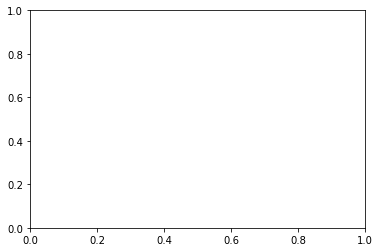

In [137]:
b=[]
print(train)
for i in range(5,1000,100):
    b.append(i)
print(b)
plt.plot(b,error)
plt.plot(b,train)